<a href="https://colab.research.google.com/github/faridig/MNIST_FASHION/blob/main/MNIST_FASHION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
from keras.datasets import fashion_mnist #dataset mnist
from keras.models import Sequential #empilement couche par couche p.58
from keras.layers import Dense, Dropout, Flatten, BatchNormalization #différentes couches que l'on rajoute
from keras import backend as K #gestion tenseurs, opération mathématiques
from keras.callbacks import EarlyStopping #pr stopper si pas d'amélioration
from keras.callbacks import TensorBoard #interface graph
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import keras


#Regression logisic : Baseline accuracy: 0.8347


In [141]:
# Chargement du dataset Fashion MNIST
# La fonction load_data() de Keras nous permet de charger le dataset Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train[:10])


# Affichage de la taille du dataset
print("Taille du dataset d'entrainement:", X_train.shape)
print("Taille du dataset de test:", X_test.shape)

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ... 180   0   0]
  [  0   0   0 ...  72   0   0]
  [  0   0   0 ...  70   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...  39   1   0]
  ...
  [  0   0   0 ... 238   0   0]
  [  0   0   0 ... 131   0   0]
  [  0   0   0 ...   0   0  

In [142]:
# le dataset contient 10 classes
#Voici à quoi correspondent ces labels : T-shirt/top 1: Trouser 2: Pullover 3: Dress 4: Coat 5: Sandal 6: Shirt 7: Sneaker 8: Bag 9: Ankle boot

unique_labels = np.unique(y_train)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

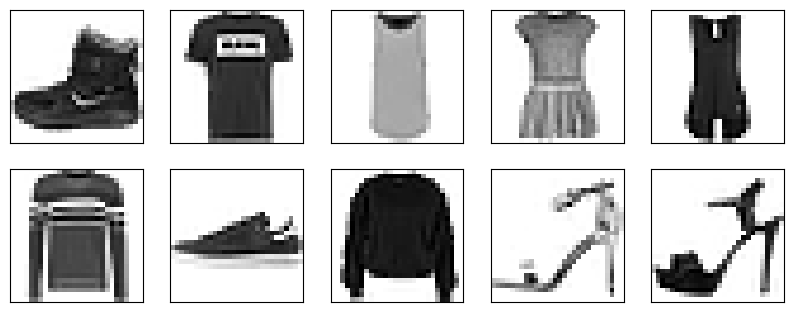

In [143]:
# Visualisation des données
import numpy as np

# Afficher les 10 premières images du dataset
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [144]:
#conversion des labels en cat
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [145]:
# Normalisation des valeurs de pixel
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [146]:
#construction du model
model = Sequential()

'''Cette ligne aplatit les images d'entrée. Les images 2D de 28x28 pixels sont transformées en un vecteur 1D
réseau de neurones s'attendent à des entrées qui sont des vecteurs (1D)'''
#couche1 pr aplatir les images
model.add(Flatten(input_shape=(28, 28)))


#couche2 de neurones avec 128 neurones
model.add(Dense(128, activation='elu'))

model.add(Dense(128, activation='elu'))

model.add(Dense(128, activation='elu'))

model.add(Dense(128, activation='elu'))

model.add(Dense(128, activation='elu'))

model.add(Dense(128, activation='elu'))

model.add(Dense(128, activation='elu'))

#couche3 de sortie, softmax car multi labels
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adamax',
              metrics=['accuracy'])

'''loss=keras.losses.categorical_crossentropy : Ceci définit la fonction de perte que le modèle tentera de minimiser.
La fonction de perte categorical_crossentropy est couramment utilisée pour les problèmes de classification multiclasse.
Elle compare les vraies étiquettes de classe avec les probabilités de classe prédites par le modèle.

optimizer=keras.optimizers.Adadelta() : Ceci définit l'optimiseur qui sera utilisé pour mettre à jour les poids du modèle.
 L'optimiseur Adadelta est une méthode de descente de gradient stochastique qui adapte le taux d'apprentissage à chaque paramètre,
  en gardant une fenêtre de taille fixe des mises à jour récentes. Il n'a pas besoin d'un taux d'apprentissage par défaut. '''

# Définition de l'arrêt précoce
#surveiller la perte sur l'ensemble de validation, et patience=3 arrêt entraînement si la perte sur l'ensemble de validation ne s'améliore pas pendant 3 époques consécutives.
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

#tensorboard pr la visualition
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)

#affichage résumé du modèle
model.summary()

'''En résumé, le modèle prend des images en entrée, les aplati en un vecteur de taille 784 avec la couche flatten_6,
 puis passe ce vecteur à travers une couche dense dense_10 avec 128 neurones,
 et enfin à travers une autre couche dense dense_11 avec 10 neurones.
 Le modèle a un total de 101770 paramètres à apprendre.'''


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 128)               100480    
                                                                 
 dense_49 (Dense)            (None, 128)               16512     
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 dense_51 (Dense)            (None, 128)               16512     
                                                                 
 dense_52 (Dense)            (None, 128)               16512     
                                                                 
 dense_53 (Dense)            (None, 128)             

'En résumé, le modèle prend des images en entrée, les aplati en un vecteur de taille 784 avec la couche flatten_6,\n puis passe ce vecteur à travers une couche dense dense_10 avec 128 neurones, \n et enfin à travers une autre couche dense dense_11 avec 10 neurones. \n Le modèle a un total de 101770 paramètres à apprendre.'

In [147]:
#entrainement du modèle

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=300,
          callbacks=[tensorboard, early_stopping])

Epoch 1/300
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4853 - accuracy: 0.8224 - val_loss: 0.4355 - val_accuracy: 0.8427
Epoch 2/300
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3780 - accuracy: 0.8598 - val_loss: 0.3948 - val_accuracy: 0.8549
Epoch 3/300
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3459 - accuracy: 0.8722 - val_loss: 0.4179 - val_accuracy: 0.8486
Epoch 4/300
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3248 - accuracy: 0.8790 - val_loss: 0.3818 - val_accuracy: 0.8634
Epoch 5/300
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3050 - accuracy: 0.8866 - val_loss: 0.3501 - val_accuracy: 0.8716
Epoch 6/300
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2917 - accuracy: 0.8901 - val_loss: 0.3429 - val_accuracy: 0.8765
Epoch 7/300
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2782 - accuracy: 0.8960 - val_loss: 0.3300 -

In [148]:
# Enfin, nous évaluons le modèle sur le dataset de test pour obtenir la précision finale du modèle.
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3344568908214569
Test accuracy: 0.8828999996185303


In [149]:
'''

#couche1 pr aplatir les images
model.add(Flatten(input_shape=(28, 28)))

model.add(BatchNormalization())

#couche2 de neurones avec 128 neurones
model.add(Dense(128, activation='selu'))
model.add(BatchNormalization())

#couche3 de sortie, softmax car multi labels
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adamax',
              metrics=['accuracy'])

Test loss: 0.33261948823928833
Test accuracy: 0.888700008392334
-------------------------------------------------

#couche1 pr aplatir les images
model.add(Flatten(input_shape=(28, 28)))

model.add(BatchNormalization())

#couche2 de neurones avec 128 neurones
model.add(Dense(128, activation='selu'))
model.add(BatchNormalization())

#couche3 de sortie, softmax car multi labels
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


Test loss: 0.3331810534000397
Test accuracy: 0.8870999813079834


--------------------------------------------------------------------------------






'''

" \n\n#couche1 pr aplatir les images\nmodel.add(Flatten(input_shape=(28, 28)))\n\nmodel.add(BatchNormalization())\n\n#couche2 de neurones avec 128 neurones\nmodel.add(Dense(128, activation='selu'))\nmodel.add(BatchNormalization())\n\n#couche3 de sortie, softmax car multi labels\nmodel.add(Dense(num_classes, activation='softmax'))\n\n\nmodel.compile(loss=keras.losses.categorical_crossentropy,\n              optimizer='adamax',\n              metrics=['accuracy'])\n\nTest loss: 0.33261948823928833\nTest accuracy: 0.888700008392334\n-------------------------------------------------\n\n#couche1 pr aplatir les images\nmodel.add(Flatten(input_shape=(28, 28)))\n\nmodel.add(BatchNormalization())\n\n#couche2 de neurones avec 128 neurones\nmodel.add(Dense(128, activation='selu'))\nmodel.add(BatchNormalization())\n\n#couche3 de sortie, softmax car multi labels\nmodel.add(Dense(num_classes, activation='softmax'))\n\n\nmodel.compile(loss=keras.losses.categorical_crossentropy,\n              optimiz